# Ejercicio 5 - Regularización

La regularización busca resolver problemas mal condicionados a partir del conocimiento de problemas bien condicionados, buscando un balance entre amplificación del ruido y calidad de la reconstrucción.
Los métodos más comunes de regularización se dividen en directos, iterativos, recursivos y estocásticos.

In [61]:
import numpy as np

In [62]:
import matplotlib.pyplot as plt

In [63]:
import cv2 as cv

### Carga de la imagen

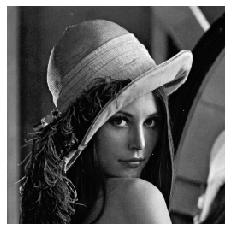

In [64]:
img = cv.imread('../resources/lena.tif', cv.IMREAD_GRAYSCALE) / 255
img = cv.resize(img, (255, 255))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Distorsion de la imagen

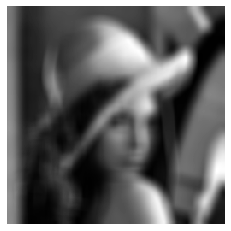

[[ 7.91209055e-01  8.93381278e-03  1.98017065e-01 ... -8.08731547e-01
  -8.85286632e-01  1.65703550e+00]
 [ 7.88237278e-01  1.98177222e-02  1.80419740e-01 ... -8.12545316e-01
  -8.78471134e-01  1.65233320e+00]
 [ 7.87229598e-01  2.25418260e-02  1.44874659e-01 ... -8.16693171e-01
  -8.73238576e-01  1.65166091e+00]
 ...
 [ 4.22239436e+00 -7.70485325e+00 -1.07640868e+01 ...  4.84101700e+00
   3.12531353e+00 -6.69492269e+00]
 [ 4.31539125e+00 -7.90403485e+00 -1.09135611e+01 ...  4.97067586e+00
   3.20402840e+00 -6.86530087e+00]
 [ 4.34260741e+00 -7.95757632e+00 -1.09425920e+01 ...  4.99932940e+00
   3.22336845e+00 -6.90300387e+00]]


In [77]:
n_blurr = 15
H_blurr = np.ones((n_blurr,n_blurr)) / n_blurr**2
img_distorted = cv.filter2D(img, -1, H_blurr)

H = img_distorted @ np.linalg.inv(img)

plt.imshow(img_distorted, cmap='gray')
plt.axis('off')
plt.show()

## Agregado de ruido

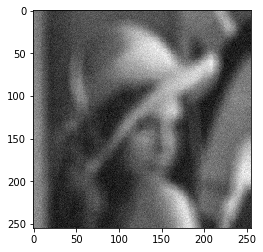

In [78]:
noise =  np.random.normal(loc=0, scale=0.03, size=img.shape)
g = img_distorted + noise
plt.imshow(g, cmap='gray')
plt.show()

In [97]:
Caux = np.array([[0, -0.25, 0],
                 [-0.25,  -1, -0.25],
                 [0, -0.25, 0]], np.float32)

aux = cv.filter2D(img, -1, Caux)

C = aux @ np.linalg.inv(img)

In [98]:
def insert_at_center(matrix, new_size):
    ret = np.zeros((new_size, new_size))
    na = matrix.shape[0]
    nb = new_size
    lower = (nb) // 2 - (na // 2)
    upper = (nb // 2) + (na // 2) + 1
    print(f'Lower: {lower} Upper: {upper}')
    ret[lower:upper, lower:upper] = matrix
    
    return ret

In [90]:
# C and H matrixes need to have the same shape as the image, insert them at the center of empty matrixes
n_img = img.shape[0]

# C = insert_at_center(Caux, n_img)
# H = insert_at_center(H_blurr, n_img)
# C = np.eye(n_img)

In [106]:
# Constante de Tikhonov-Miller
bsnr = np.var(img.flatten()) / n_img**2 /  np.var(noise.flatten()) 
alpha =  1 / bsnr
print(alpha)

1534.3221771988724


In [107]:
lambdas, _ = np.linalg.eig(H.T @ H + alpha * C.T @ C)
lambda_max = np.abs(lambdas).max()

In [108]:
beta = 2 / lambda_max
print(beta)

1.726268674446751e-08


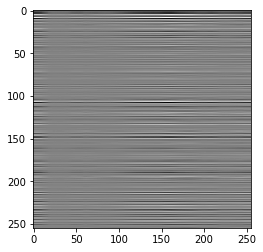

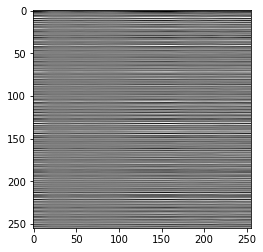

In [118]:
fk = (beta * H.T) @ g # fo
plt.imshow(fk, cmap='gray')
plt.figure()
for k in range(50):
    fk = fk + beta * (H.T @ g - (H.T @ H + alpha * C.T @ C) @ fk)

plt.imshow(fk, cmap='gray')
plt.show()

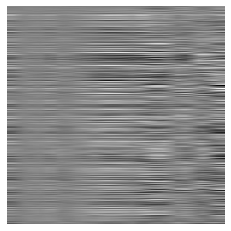

In [114]:
f = np.linalg.inv(H.T @ H + alpha * C.T @ C) @ H.T @ img_distorted
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()